In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("churn data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#replacing blanks with 0 as tenure is 0 and no total charges are recorded.

In [3]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
int(df["customerID"].duplicated().sum())


0

#convert 0 and 1 values of senior citizen to Yes/No to make it easer to understand.

In [13]:
def convert(n):
   if n==1:
       return "Yes"
   else:
       return "No"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(convert)
print(df.head(30))

    customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female            No     Yes         No       1           No   
1   5575-GNVDE    Male            No      No         No      34          Yes   
2   3668-QPYBK    Male            No      No         No       2          Yes   
3   7795-CFOCW    Male            No      No         No      45           No   
4   9237-HQITU  Female            No      No         No       2          Yes   
5   9305-CDSKC  Female            No      No         No       8          Yes   
6   1452-KIOVK    Male            No      No        Yes      22          Yes   
7   6713-OKOMC  Female            No      No         No      10           No   
8   7892-POOKP  Female            No     Yes         No      28          Yes   
9   6388-TABGU    Male            No      No        Yes      62          Yes   
10  9763-GRSKD    Male            No     Yes        Yes      13          Yes   
11  7469-LKBCI    Male            No    

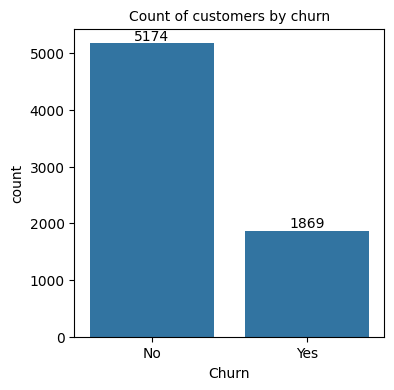

In [7]:
plt.figure(figsize=(4,4))
x=sns.countplot(x = "Churn",data=df)
x.bar_label(x.containers[0])
plt.title("Count of Customers by Churn",fontsize=10)
plt.show()

In [4]:
gb=df.groupby("Churn").agg({"Churn":"count"})
print(gb)

       Churn
Churn       
No      5174
Yes     1869


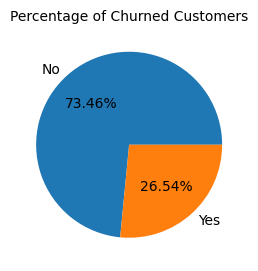

In [10]:
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

#from the given pie chart we can conclue that 26.54% of our customers have churned out
#Now let's explore reason behind it.

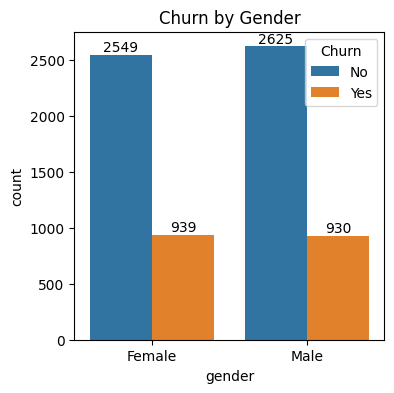

In [3]:
plt.figure(figsize=(4,4))
x=sns.countplot(x = "gender",data=df,hue="Churn")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Churn by Gender")
plt.show()

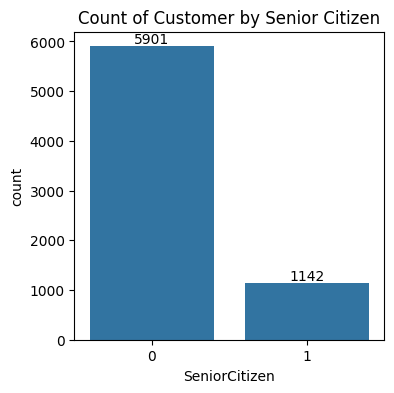

In [27]:
plt.figure(figsize=(4,4))
x=sns.countplot(x = "SeniorCitizen",data=df,)
x.bar_label(x.containers[0])
plt.title("Count of Customer by Senior Citizen")
plt.show()

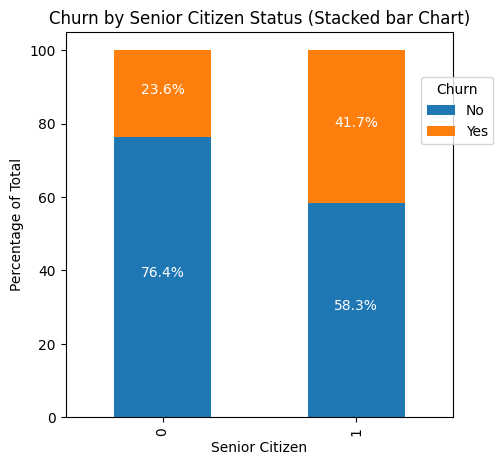

In [2]:
churn_counts = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot the stacked bar chart
churn_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(5, 5))

# Add percentages as labels on each bar segment
for i, p in enumerate(churn_counts.index):
    total = sum(churn_counts.loc[p])
    for j, (pct, value) in enumerate(churn_counts.loc[p].items()):
        plt.text(i, churn_counts.loc[p][:j].sum() + (value / 2), f'{value:.1f}%', ha='center', color='white')

# Add title and labels
plt.title("Churn by Senior Citizen Status (Stacked bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage of Total")
plt.legend(title="Churn",  bbox_to_anchor=(0.9,0.9))
plt.show()

#comparative a greater percentage of citizen category have churned.

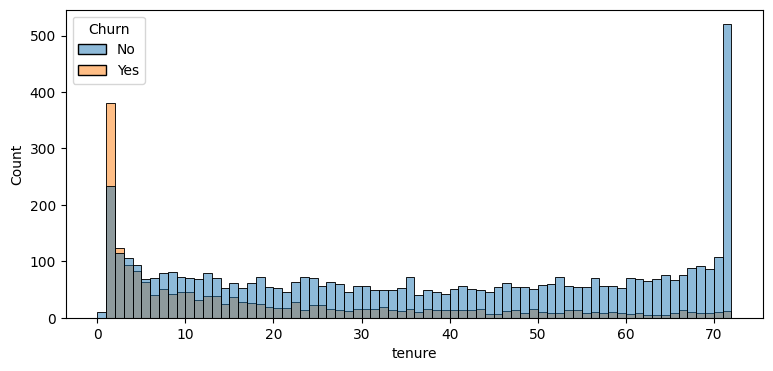

In [6]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

In [ ]:
#people who have used our services for a long time have stayed and people and people who have used our services for 1 or 2 months have churned

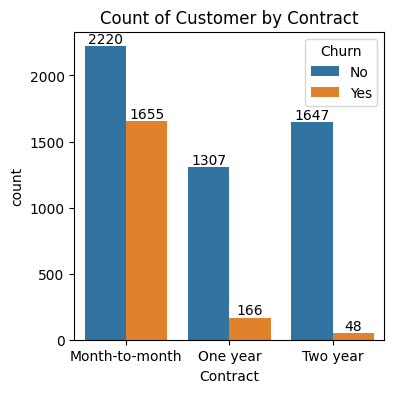

In [2]:
plt.figure(figsize=(4,4))
x=sns.countplot(x = "Contract",data=df,hue="Churn")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Count of Customer by Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [12]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

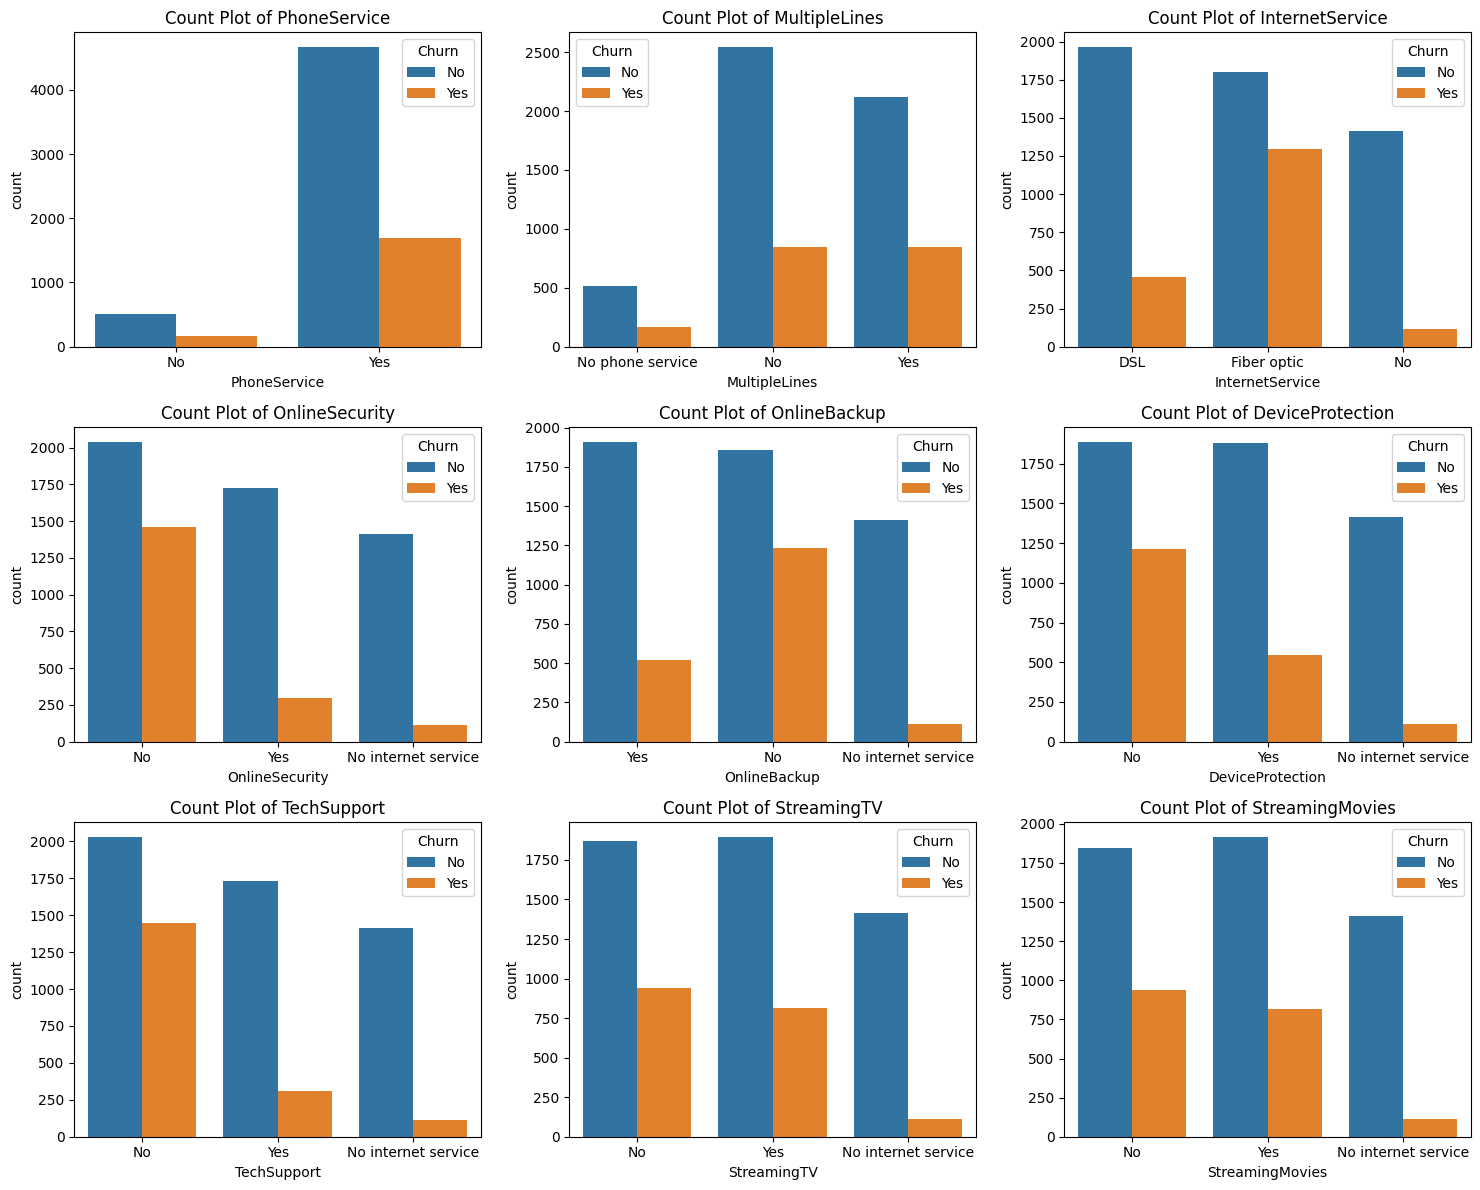

In [4]:


# Assuming you have a DataFrame 'df' with columns as listed
# Replace 'df' with your actual DataFrame name

# Define the list of columns for which you want count plots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set the size of the figure
plt.figure(figsize=(15, 12))

# Loop through each column and create a count plot for it
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each column, adjust the layout (3 rows, 3 columns here)
    sns.countplot(data=df, x=col,hue="Churn")
    plt.title(f'Count Plot of {col}')
   # plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#The plots indicate that customers with PhoneService and MultipleLines generally have lower churn rates,while fiber optic InternetService users show higher churn compared to DSL users. Additional services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are linked to lower churn, suggesting these features enhance retention. Churn is also higher among customers without streaming services, hinting at interest in entertainment options

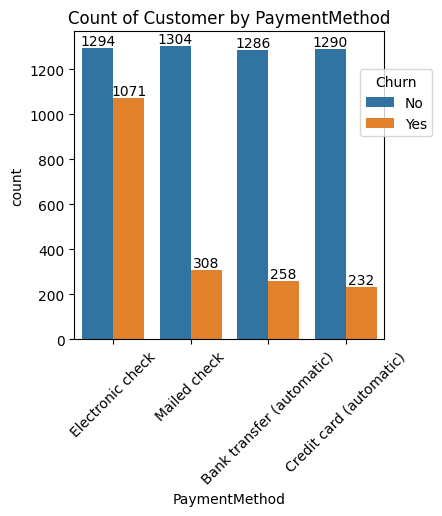

In [7]:
plt.figure(figsize=(4,4))
x=sns.countplot(x = "PaymentMethod",data=df,hue="Churn")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Count of Customer by PaymentMethod")
plt.xticks(rotation=45)
plt.legend(title="Churn",  bbox_to_anchor=(0.9,0.9))
plt.show()

#customer is likely to churn when he is using electronic check as a payment method